In [3]:
import math
import numpy as np
from scipy import optimize
from matplotlib import pyplot

In [4]:
def custom_function (arg):
    return int(math.sin(arg / 5.) * math.exp(arg / 10.) + 5. * math.exp(-arg / 2.))

def custom_vector_function(arg_Vector):
    return np.array( map(custom_function, arg_Vector) )

In [7]:
values_x = np.arange(1, 30, 0.1)
values_y = custom_vector_function(values_x)

x_bias = values_x[0]

print "x (min, max, shape) -", values_x[0], values_x[-1], values_x.shape
print "y (first, last, shape) -", values_y[0], values_y[-1],values_y.shape
print "bias on x-axis = ", x_bias

x (min, max, shape) - 1.0 29.900000000000027 (290L,)
y (first, last, shape) - 3 -5 (290L,)
bias on x-axis =  1.0


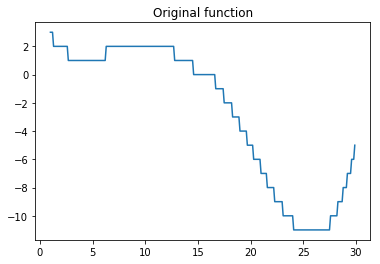

In [6]:
pyplot.title("Original function")
pyplot.plot(values_x, values_y)
pyplot.show()

In [11]:
min_result_BFGS = optimize.minimize(fun=custom_function, x0=[30,], method="BFGS")
min_point_BFGS = (min_result_BFGS.x[0], values_y[int((min_result_BFGS.x[0] - x_bias)*10-1)])

print "Gradient minimization with BFGS:"
print "Optimisation: OK = ", min_result_BFGS.success, " Message = ", min_result_BFGS.message, "Result = ", min_result.x
print "Calculated min, point = ", min_point_BFGS, " / x-bias = ", x_bias

Gradient minimization with BFGS:
Optimisation: OK =  True  Message =  Optimization terminated successfully. Result =  [27.24269431]
Calculated min, point =  (30.0, -5)  / x-bias =  1.0


In [13]:
differential_bounds = [(1, 30)]

min_result_DO = optimize.differential_evolution(func=custom_function, bounds = differential_bounds)
min_point_DO = (min_result_DO.x[0], values_y[int((min_result_DO.x[0]-x_bias)*10)-1])

print "Differential evolution optimization:"
print "Optimisation: OK = ", min_result_DO.success, " Message = ", min_result_DO.message, "Result = ", min_result_DO.x
print "Calculated min, point = ", min_point_DO, " / x-bias = ", x_bias

Differential evolution optimization:
Optimisation: OK =  True  Message =  Optimization terminated successfully. Result =  [25.88142885]
Calculated min, point =  (25.881428846866694, -11)  / x-bias =  1.0


Min. value of func (check) =  -11
Min. value index  (check) =  25.8

Min. value of func (BFGS) =  (30.0, -5)
Min. value  of func (DE) =  (25.881428846866694, -11)


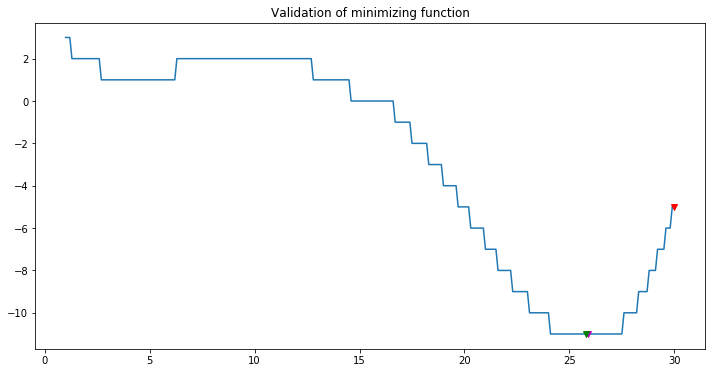

Approximation error =  4.199999999999999 (BFGS) 0.08142884686669305 (DO)

Answer:  -5.00 -11.00


In [44]:
check_min_value_func = values_y.min()
check_min_value_index = x_bias + np.average(np.where(values_y == check_min_value_func)[0])/10.
    
print "Min. value of func (check) = ", check_min_value_func
print "Min. value index  (check) = ", check_min_value_index

print "\nMin. value of func (BFGS) = ", (min_point_BFGS[0], min_point_BFGS[1])
print "Min. value  of func (DE) = ", (min_point_DO[0],min_point_DO[1])

pyplot.title("Validation of minimizing function")

pyplot.plot(values_x, values_y)
pyplot.plot(min_point_BFGS[0], min_point_BFGS[1], "rv")
pyplot.plot(min_point_DO[0], min_point_DO[1], "mv")
pyplot.plot(check_min_value_index, check_min_value_func, "gv")
pyplot.rcParams["figure.figsize"] = [12, 6]
pyplot.show()

print "Approximation error = ", abs(min_point_BFGS[0] - check_min_value_index), "(BFGS)" , \
    abs(min_point_DO[0] - check_min_value_index), "(DO)"

print "\nAnswer: ", "{0:.2f}".format(min_point_BFGS[1]),"{0:.2f}".format(min_point_DO[1])

In [41]:
print "Result validation check:"
with np.printoptions(precision=3, suppress=True):
    print(values_y)

Result validation check:
[  3   3   3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1  -1  -1  -1
  -1  -1  -1  -2  -2  -2  -2  -2  -2  -2  -2  -3  -3  -3  -3  -3  -3  -3
  -4  -4  -4  -4  -4  -4  -4  -5  -5  -5  -5  -5  -5  -6  -6  -6  -6  -6
  -6  -6  -7  -7  -7  -7  -7  -7  -8  -8  -8  -8  -8  -8  -8  -9  -9  -9
  -9  -9  -9  -9  -9 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -11 -11 -11
 -11 -11 -11 -11 -11 -11 -

In [31]:
np.where(values_y == check_min_value_func)

(array([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265], dtype=int64),)

In [33]:
np.average(np.where(values_y == check_min_value_func)[0])

248.0